Импорт библиотек

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pytest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

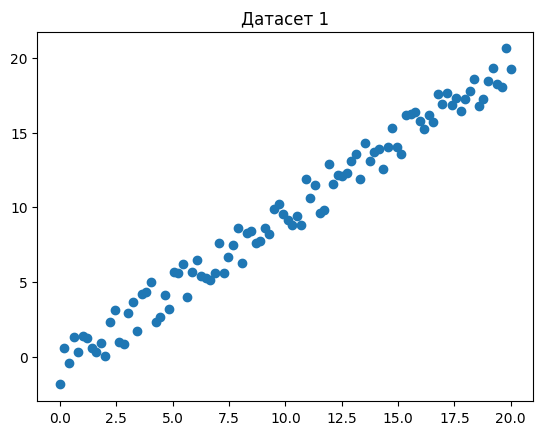

In [78]:
# Датасет 1
dataset1_x = np.linspace(0, 20, 100)
dataset1_y = dataset1_x + np.random.random(100)*3 - 2

plt.scatter(dataset1_x, dataset1_y)
plt.title("Датасет 1")
plt.show()

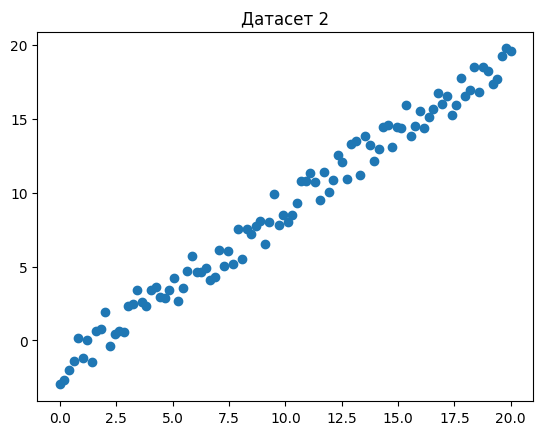

In [79]:
# Датасет 2
dataset2_x = np.linspace(0, 20, 100)
dataset2_y = 1.05*dataset2_x + np.random.random(100)*3 - 3

plt.scatter(dataset2_x, dataset2_y)
plt.title("Датасет 2")
plt.show()

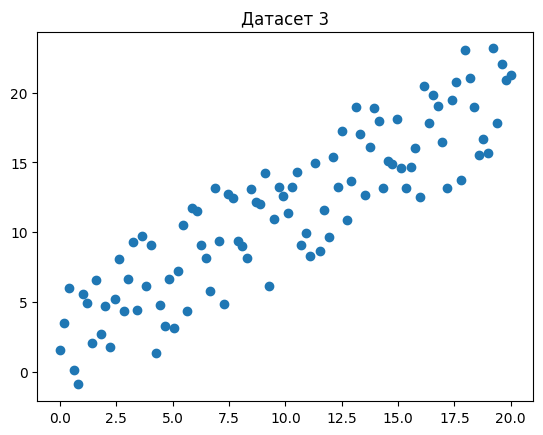

In [80]:
# Датасет 3
dataset3_x = np.linspace(0, 20, 100)
dataset3_y = 0.93*dataset3_x + np.random.random(100)*10- 3

plt.scatter(dataset3_x, dataset3_y)
plt.title("Датасет 3")
plt.show()

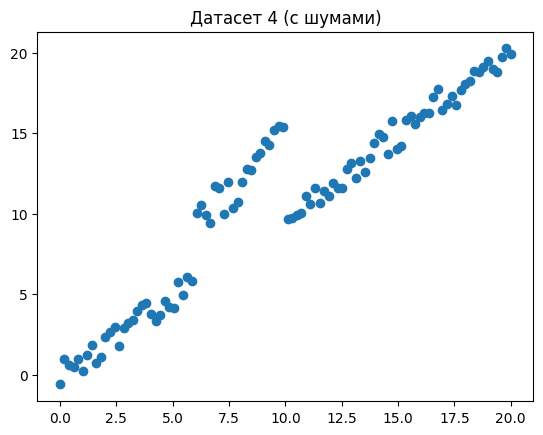

In [81]:
# Датасет 4 (с шумами)
dataset4_x = np.linspace(0, 20, 100)
dataset4_y = dataset4_x + np.random.random(100)*2 - 1
dataset4_y[30:50] *= 1.5

plt.scatter(dataset4_x, dataset4_y)
plt.title("Датасет 4 (с шумами)")
plt.show()

In [82]:
X_train = dataset1_x.reshape(-1, 1)
y_train = dataset1_y

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

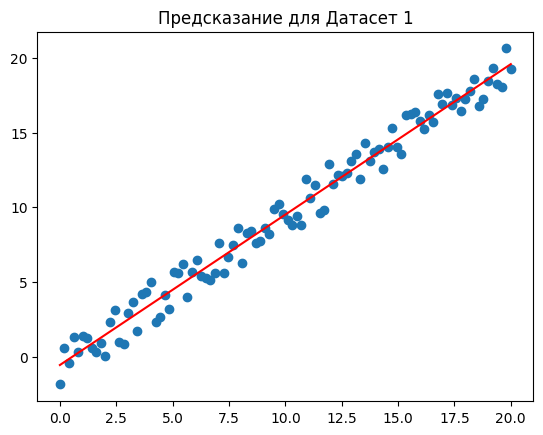

MSE: 0.79
R2: 0.98



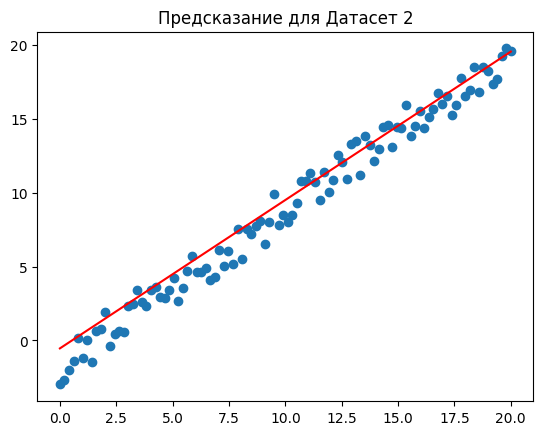

MSE: 1.23
R2: 0.97



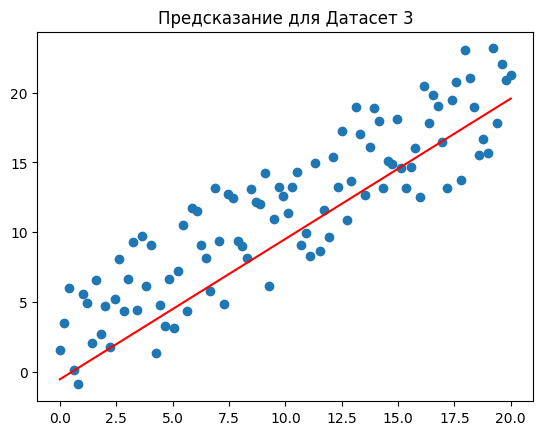

MSE: 11.76
R2: 0.65



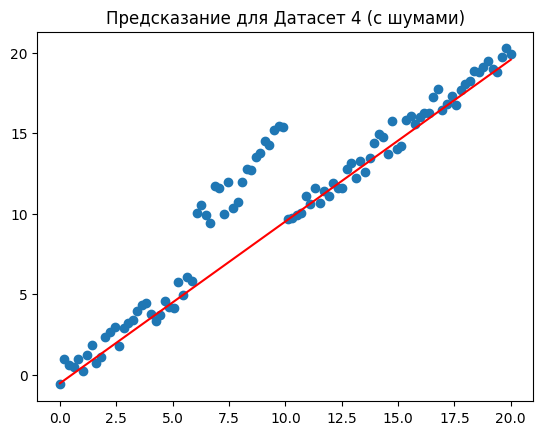

MSE: 5.18
R2: 0.85



In [83]:
def get_predictions(x, y, dataset_name, id):
    y_pred = model.predict(x.reshape(-1, 1))

    np.savetxt(f"y_{id}.csv", y)
    np.savetxt(f"y_pred_{id}.csv", y_pred)

    plt.scatter(x, y)
    plt.plot(x.reshape(-1, 1), y_pred, color="red")
    plt.title(f"Предсказание для {dataset_name}")
    plt.show()

    print(f"MSE: %.2f" % mean_squared_error(y, y_pred))
    print(f"R2: %.2f" % r2_score(y, y_pred))
    print()

get_predictions(dataset1_x, dataset1_y, "Датасет 1", 1)
get_predictions(dataset2_x, dataset2_y, "Датасет 2", 2)
get_predictions(dataset3_x, dataset3_y, "Датасет 3", 3)
get_predictions(dataset4_x, dataset4_y, "Датасет 4 (с шумами)", 4)

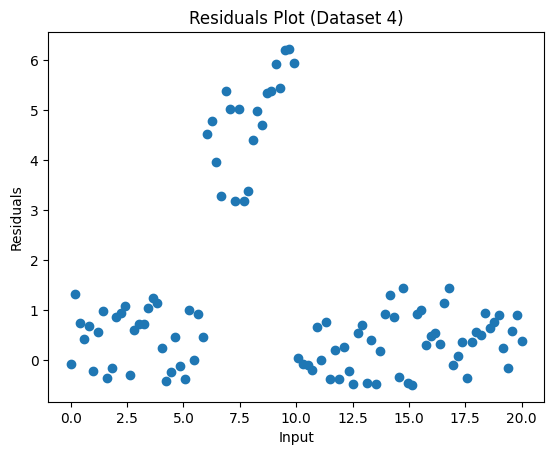

In [84]:
# Анализ остатков модели на датасете 4
y_pred4 = model.predict(dataset4_x.reshape(-1, 1))
residuals = dataset4_y - y_pred4.flatten()

plt.scatter(dataset4_x, residuals)
plt.xlabel("Input")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Dataset 4)")
plt.show()

Глядя на график остатков, можно отметить несколько проблем:
1.   Неравномерность разброса остатков: Остатки не распределены равномерно вокруг нуля. В некоторых областях наблюдается большее скопление точек с высокими значениями остатков (например, около x = 7.5 и x = 10). Это может свидетельствовать о гетероскедастичности, то есть непостоянстве дисперсии ошибок модели.
2.   Неслучайность распределения остатков: Можно заметить определенные паттерны в распределении остатков. Например, около x = 7.5 и x = 10 остатки сгруппированы в вертикальные "столбики". Это может указывать на нелинейную зависимость в данных, которую модель не смогла уловить.
3.   Наличие выбросов: Встречаются точки, значительно удаленные от остальных. Например, точка около x = 10 с остатком около 6. Выбросы могут искажать результаты модели и снижать ее точность.

### Шаг 5: Тестирование работы модели на всех 4 датасетах

In [91]:
%%writefile test_score.py
import numpy as np
import pytest
from sklearn.metrics import mean_squared_error, r2_score


@pytest.fixture
def load_y():
    y = [np.loadtxt(f"y_{id}.csv") for id in range(1, 5)]
    return y

@pytest.fixture
def load_y_pred():
    y_pred = [np.loadtxt(f"y_pred_{id}.csv") for id in range(1, 5)]
    return(y_pred)

def test_mse(load_y, load_y_pred):
    failed_tests = []
    for id, (ys, y_pred) in enumerate(zip(load_y, load_y_pred), start=1):
        try:
            assert mean_squared_error(ys, y_pred) < 2
        except AssertionError:
            failed_tests.append(f"Test failed for file: y_{id}.csv (MSE)")
    if failed_tests:
        pytest.fail("\n".join(failed_tests))

def test_r2(load_y, load_y_pred):
    failed_tests = []
    for id, (y, y_pred) in enumerate(zip(load_y, load_y_pred), start=1):
        try:
            assert r2_score(y, y_pred) > 0.8
        except AssertionError:
            failed_tests.append(f"Test failed for file: y_{id}.csv (R2)")
    if failed_tests:
        pytest.fail("\n".join(failed_tests))

Overwriting test_score.py


In [92]:
!pytest -v test_score.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0 -- /usr/bin/python3
cachedir: .pytest_cache
rootdir: /content
plugins: anyio-3.7.1
collected 2 items                                                                                  

test_score.py::test_mse FAILED                                                               [ 50%]
test_score.py::test_r2 FAILED                                                                [100%]

============================================= FAILURES =============================================
_____________________________________________ test_mse _____________________________________________

load_y = [array([-1.84454473,  0.6093935 , -0.38035587,  1.35470506,  0.34374627,
        1.3772374 ,  1.26504165,  0.57150644,...87959, 18.78350224, 19.12133752, 19.46393367,
       19.00403205, 18.79168518, 19.74652314, 20.26889941, 19.9515606 ])]
